# K Nearest Neighbors Project 1

Let's assume that I been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data.csv', index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop(columns='TARGET CLASS'))
scaled_features = scaler.transform(df.drop(columns='TARGET CLASS'))

In [6]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [7]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Using KNN

We are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
predictions = knn.predict(X_test)

## Evaluation

Let's evaluate our knn model

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(confusion_matrix(y_test, predictions))

[[151   8]
 [ 15 126]]


In [16]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Choosing a K value

We'll go ahead and use elbow method to use a better K value

In [17]:
error_rate = []

for i in range(1,41):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train, y_train)
    pred_i = knn_i.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

### Plotting the error rates

Text(0, 0.5, 'Error rate')

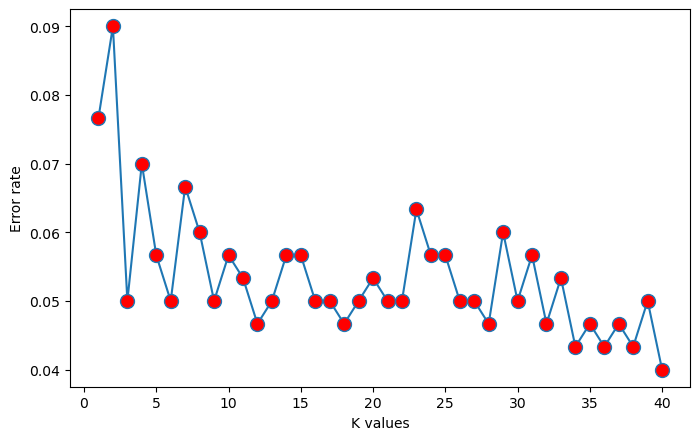

In [18]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(range(1,41), error_rate, marker='o', markersize=10, markerfacecolor='red')
plt.xlabel('K values')
plt.ylabel('Error rate')

**K=19 looks to be a good value, after 19 the error seems to bounce up and down arount 0.04 and 0.06**

In [19]:
# First quick comparison to our original K=1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predicitons = knn.predict(X_test)

print('With K=1\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

With K=1

[[151   8]
 [ 15 126]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [23]:
# Now with K=19

knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print('With K=19\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

With K=19

[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



**We were able to squeeze more performance out of our model with a better K value**

## The End